#### **Name: Angad Gupta**
#### **Enroll No: 21SOECE11614**
#### **Roll No: 14**

## **Create a Neural Network in TensorFlow for Linear Regression**

Continuos data is suitable for linear regression.

There is no activation function in linear regresssion for  last layers - Dense layer.

**Loss Functions - MSE, SGD and RMSE**

- The MSE is a common loss function used in regression tasks. It quantifies the average squared difference between predicted values and actual target values.

- SGD is an optimization algorithm commonly used for training machine learning models.

- The goal is to minimize the loss function (like MSE) by adjusting the weights based on the gradient of the loss with respect to the weights.

- RMSE is a variant of MSE that provides a more interpretable metric.


- Like MSE, lower RMSE values indicate better model performance.


### **1. Import necesary library**

In [1]:
# import necesssary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

### **2. Fetch datasets**

In [2]:
diabetes = load_diabetes()  # Load diabetes dataset
X = diabetes.data  # Input features
y = diabetes.target  # Target variable

# Display feature names and description of the dataset
print(f"Features name: {diabetes.feature_names}")
print(diabetes.DESCR)


Features name: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6

In [3]:
# Create a DataFrame to view data
df = pd.DataFrame(X, columns=diabetes.feature_names)
df["Target"] = y
print(df.head())  # Display the first few rows

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [4]:
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

### **3. Split the dataset into training and testing sets**

In [5]:
# Split the datasets into trainig and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **3. Build the neural network model**

In [7]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))  # First hidden layer
model.add(Dense(32, activation="relu"))  # Second hidden layer
model.add(Dense(16, activation="relu"))  # Third hidden layer
model.add(Dense(1))  # Output layer (no activation function needed for regression)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###**4. Compile the model**

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")  # Use Adam optimizer and MSE loss

### **5. Train the model**

In [9]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)  # Train for 100 epochs with batch size of 32

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 32141.4414 - val_loss: 22336.5996
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 31679.0176 - val_loss: 22202.4336
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 28181.8105 - val_loss: 22007.9961
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 31064.4023 - val_loss: 21703.8691
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 30022.2578 - val_loss: 21238.0801
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 28904.0410 - val_loss: 20541.0137
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 28655.5391 - val_loss: 19541.0215
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 25934.4902 - val_loss: 18147.7930
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 26206.3984 - val_loss: 16250.9668
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 24025.6133 - val_loss: 13863.7031
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19536.7559 - val_lo

### **6. Evaluate the model**

In [10]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2965.8718 
Test loss: 2799.214599609375


### **7. Make predictions**

In [11]:
# make predictions
predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [12]:
print(f"Predicted values: {predictions[:10].flatten()}")  # Print first 10 predicted values
print(f"True values: {y_test[:10]}")  # Print first 10 true values


Predicted values: [168.3525  192.3001  158.4501  310.03992  90.93694 112.13917 270.10718
 169.8105  105.01094  75.35829]
True values: [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]


### **8. Visualize actual vs predicted values**

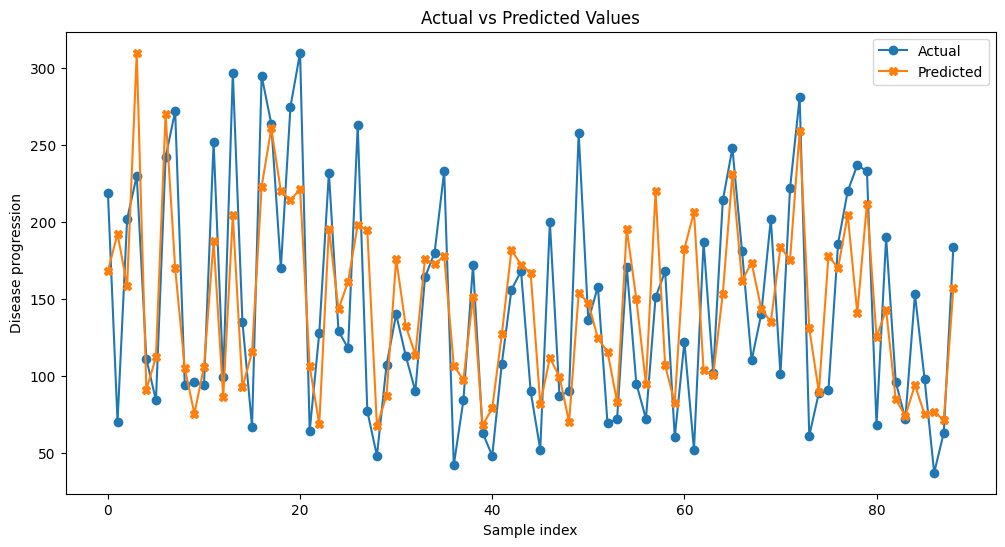

In [13]:
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(y_test, label="Actual", marker="o")  # Plot actual values
plt.plot(predictions, label="Predicted", marker="X")  # Plot predicted values
plt.xlabel("Sample index")
plt.ylabel("Disease progression")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()  # Show the plot
